# 04. Train OCR CNN
This notebook trains the OCR model to recognize characters (0-9, A-Z). It uses a CNN for multi-class classification.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt

In [3]:
# Config
DATA_DIR = '../data/processed/train_ocr'
MODEL_PATH = '../models/ocr_cnn.h5'
IMG_SIZE = (32, 32)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 36 # 0-9 + A-Z

In [4]:
# Load Data
if os.path.exists(DATA_DIR):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        label_mode='categorical'
    )
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        label_mode='categorical'
    )
    
    class_names = train_ds.class_names
    
    # Normalize
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
    
    print(f'Classes: {class_names}')
else:
    print('Data directory not found. Run Notebook 02 first.')

Found 35500 files belonging to 35 classes.
Using 28400 files for training.
Found 35500 files belonging to 35 classes.
Using 7100 files for validation.
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names) if 'class_names' in locals() else NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Paco\miniconda3\envs\AI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,371 (1.21 MB)

 Trainable params: 318,371 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train
if 'train_ds' in locals():
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )
    
    # Save
    model.save(MODEL_PATH)
    print(f'Model saved to {MODEL_PATH}')

Epoch 1/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7480 - loss: 0.8708 - val_accuracy: 0.9732 - val_loss: 0.1081
Epoch 2/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9330 - loss: 0.2163 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 3/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9554 - loss: 0.1377 - val_accuracy: 0.9928 - val_loss: 0.0300
Epoch 4/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9654 - loss: 0.1094 - val_accuracy: 0.9925 - val_loss: 0.0267
Epoch 5/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9725 - loss: 0.0850 - val_accuracy: 0.9959 - val_loss: 0.0166
Epoch 6/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9761 - loss: 0.0742 - val_accuracy: 0.9976 - val_loss: 0.0118
Epoch 7/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9805 - loss: 0.0597 - val_accuracy: 0.9966 - val_loss: 0.0126
Epoch 8/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9823 - loss: 0.0543 - 

Model saved to ../models/ocr_cnn.h5


Gráfica guardada en reports/images/


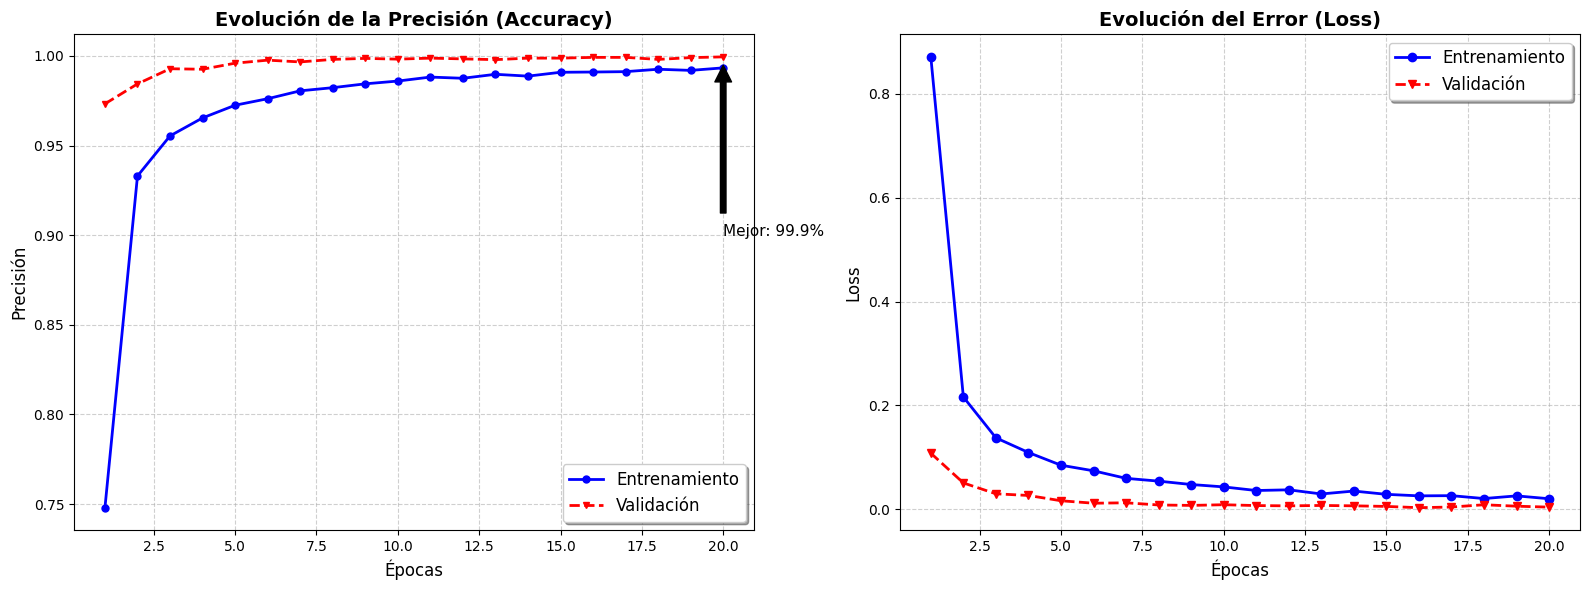

In [8]:
import matplotlib.pyplot as plt
import os

if 'history' in locals():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Crear una figura grande con dos gráficas lado a lado
    plt.figure(figsize=(16, 6)) 
    
    # --- GRÁFICA 1: PRECISIÓN (ACCURACY) ---
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Entrenamiento', linewidth=2, markersize=5)
    # CORREGIDO: 'rv--' (Red, v-marker, dashed)
    plt.plot(epochs, val_acc, 'rv--', label='Validación', linewidth=2, markersize=5)
    plt.title('Evolución de la Precisión (Accuracy)', fontsize=14, fontweight='bold')
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Precisión', fontsize=12)
    plt.legend(loc='lower right', fontsize=12, shadow=True)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Anotación del mejor valor
    best_val_acc = max(val_acc)
    best_epoch = val_acc.index(best_val_acc) + 1
    plt.annotate(f'Mejor: {best_val_acc:.1%}', 
                 xy=(best_epoch, best_val_acc), 
                 xytext=(best_epoch, best_val_acc - 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=11)

    # --- GRÁFICA 2: PÉRDIDA (LOSS) ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Entrenamiento', linewidth=2)
    # CORREGIDO: 'rv--'
    plt.plot(epochs, val_loss, 'rv--', label='Validación', linewidth=2)
    plt.title('Evolución del Error (Loss)', fontsize=14, fontweight='bold')
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', fontsize=12, shadow=True)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    
    # Crear carpeta si no existe y guardar
    os.makedirs('../reports/images', exist_ok=True)
    plt.savefig('../reports/images/training_history.png', dpi=300)
    print("Gráfica guardada en reports/images/")
    
    plt.show()
else:
    print("No se encontró el objeto 'history'. Entrena el modelo primero.")